<a href="https://colab.research.google.com/github/sitthatkaja/DPDM2023/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **START**

- # **Data Preparation**

In [2]:
import pandas as pd
import numpy as np

# META DATA

Name		Data Type	Meas.	Description

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


- ✔️ (1) Set header = None and Set Columns names

In [3]:
col_name = ['a1', 'a2',	'a3',	'a4',	'a5',	'a6',	'a7',	'a8',	'a9','a10','a11', 'a12',	'a13',	'a14',	'a15',	'a16']

In [4]:
credit = pd.read_csv('/content/drive/MyDrive/DPDM23_DATA/crx.data', header = None, names=col_name) # (1) Set header = None  ### ไม่มีชื่อ Cloums / หัวตาราง (Because there is no column name)
print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
credit = credit[['a3','a8',	'a9','a10','a11', 'a12',	'a13','a15',	'a16']]

In [6]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

Preprocessing

In [7]:
credit = credit.replace({'t':1,'f':0,'g':1,'p':2,'s':3,'+':1,'-':0})
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


#try Simple ML

In [8]:
import numpy as np

In [9]:
np.random.seed(seed = 1)

In [10]:
a = np.random.randint(2, size = len(credit))

In [11]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [12]:
train = credit [a==1]
train.shape

(324, 9)

In [13]:
test = credit [a==0]
test.shape

(366, 9)

import

In [14]:
from sklearn.tree import DecisionTreeClassifier

define

In [15]:
Dtree1 = DecisionTreeClassifier(random_state=0)

train

In [16]:
X_train = train.iloc[:,:-1]

In [17]:
y_train = train.iloc[:,-1]

In [18]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
from sklearn import tree

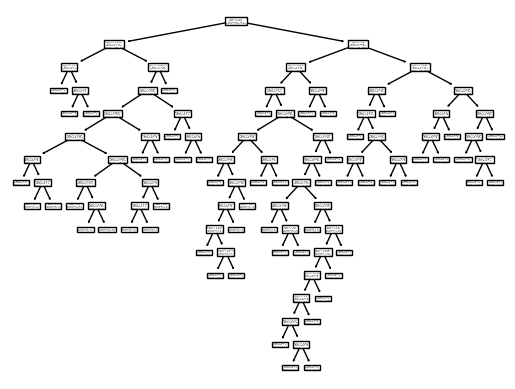

In [20]:
tree.plot_tree(Dtree1);

test

In [21]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [22]:
y_predict = Dtree1.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, y_predict)

0.825136612021858

## Set parameter

import

In [25]:
from sklearn.tree import DecisionTreeClassifier

Deine

In [26]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=4)

Train

In [27]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

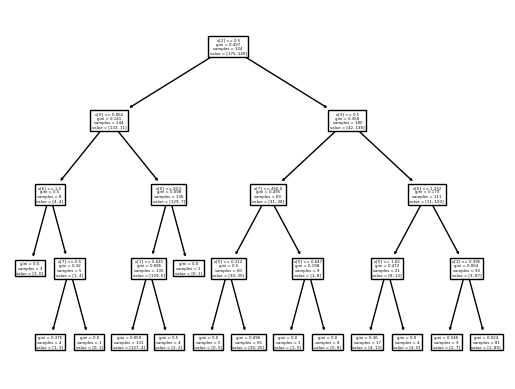

In [28]:
tree.plot_tree(Dtree2);

Test

In [29]:
y_predict2 = Dtree2.predict(X_test)

In [30]:
accuracy_score(y_test, y_predict2)

0.8579234972677595

# HW5 Build a decision tree model which hass better than 0.86 and describe about parameters you set

Deine

In [263]:
Dtree3 = DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_split = 12)

Train

In [264]:
Dtree3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=12, random_state=0)

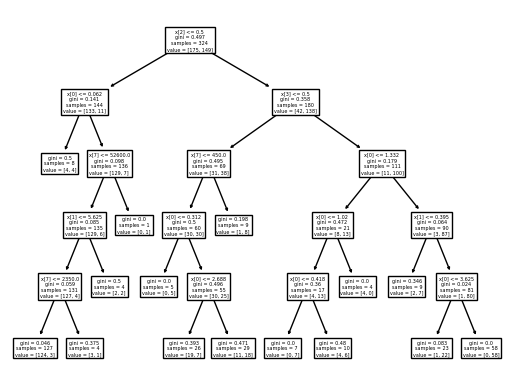

In [265]:
tree.plot_tree(Dtree3);

test

In [266]:
y_predict3 = Dtree3.predict(X_test)

In [267]:
accuracy_score(y_test, y_predict3)

0.8797814207650273

## Get Dummy

`columns=['Sex']`

In [31]:
Abalone_pre = pd.get_dummies(Abalone, columns=['Sex'])
Abalone_pre

NameError: ignored

## (2) Set header = 0

- ถ้าให้คำสั่งนี้จะทำให้แถวแรกของตารางโดนตัดทิ้งและกลายเป็นชื่อ Columns ที่เรา Set  ไว้แทน

In [ ]:
col_name = ['Sex', 'Length',	'Diam',	'Height',	'Whole',	'Shucked',	'Viscera',	'Shell',	'Rings']

In [ ]:
Abalone = pd.read_csv('/content/drive/MyDrive/DPDM65/abalone.data', header = 0, names=col_name)
print(Abalone.shape)
Abalone.head()

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
fig = plt.figure(figsize =(12, 8))

plt.hist(Abalone_pre['Rings'], bins=len(set(Abalone_pre['Rings']))); ##Explore ดูว่าอายุกระจายไปในทิศทางไหน

## Create New Class

- กำหนดให้อายุ เป็น 2 ช่วง คือ
>- (1) <10 (False)
>- (2) >= 10 (True)

In [ ]:
Abalone_pre['Age_CLASS'] = Abalone_pre['Rings'] >= 10
Abalone_pre

# **เริ่มทำ Data Mining**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
TRAIN = Abalone_pre.iloc[:3133,:]
TEST = Abalone_pre.iloc[3133:,:]
print(f'train = {TRAIN.shape[0]}, test = {TEST.shape[0]}')

In [ ]:
TRAIN

In [ ]:
TEST

In [ ]:
#X_train = Abalone_pre.iloc[:,:8]
X_train = TRAIN.drop(columns=['Age_CLASS', 'Rings'])
X_train

In [ ]:
#y_train = TRAIN.iloc[:,9:]
y_train = TRAIN['Age_CLASS']
y_train

In [ ]:
#X_test = TEST.iloc[:,:8]
X_test = TEST.drop(columns=['Age_CLASS', 'Rings'])
#y_test = TEST.iloc[:,9:]
y_test = TEST['Age_CLASS']

In [ ]:
X_test

In [ ]:
y_test

## 1. Decision Tree (General)

### Import

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [ ]:
Dtree1 = DecisionTreeClassifier(random_state=0)

### Build model (fit)

In [ ]:
Dtree1.fit(X_train,y_train)

### Test

In [ ]:
from sklearn import tree
tree.plot_tree(Dtree1);

In [ ]:
Dtree1.predict(X_test)

In [ ]:
 from sklearn.metrics import accuracy_score

accuracy_score(y_test, Dtree1.predict(X_test))

## ลองสร้างต้นไม้แบบคนมีความรู้

`class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)`

In [ ]:
#inport
from sklearn.tree import DecisionTreeClassifier
#Define  ##ให้ต้นไม้โตได้แค่ 6 ชั้น , max_depth = 6
Dtree2 = DecisionTreeClassifier(random_state=0, max_depth=6)
#fit
Dtree2.fit(X_train,y_train)

In [ ]:
from sklearn import tree

##Explore
tree.plot_tree(Dtree2);

In [ ]:
 from sklearn.metrics import accuracy_score

accuracy_score(y_test, Dtree2.predict(X_test))

## HW 3

- สร้าง Tree model แข่งกัน ให้แม่นที่สุด (แม่นกว่าแบบนี้) คนนั้นจะได้คะแนนเต็ม


# 🔆 **Experiment**

### Hyper-parameter tuning

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
Dtree3 = DecisionTreeClassifier(random_state=0)

### Tuning Parameters ที่มีใน  `sklearn.tree.DecisionTreeClassifier`

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"splitter":["best","random"],
          'max_depth': np.linspace(1, 7, 7, endpoint=True),
          'min_samples_leaf':  np.linspace(0.1, 0.5, 5, endpoint=True),
          'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
          'criterion': ["gini", "entropy"]}

In [ ]:
tuning_model1 =  GridSearchCV(estimator=Dtree3,
                           param_grid=params,
                           cv=5, n_jobs=-1, verbose=3, scoring = "accuracy")

In [ ]:
#tuning_model

In [ ]:
%%time
tuning_model1.fit(X_train,y_train)

In [ ]:
score_df = pd.DataFrame(tuning_model.cv_results_)
#score_df.head()
score_df.nlargest(5,"mean_test_score")

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
tuning_model1.best_estimator_

In [ ]:
dt_best1 = tuning_model1.best_estimator_

In [ ]:
evaluate_model(dt_best1)

In [ ]:
# tuned_hyper_model1 = DecisionTreeClassifier(random_state=0, max_depth=1.0, min_samples_leaf=0.1,
#                                                min_samples_split=0.1, splitter='random')

In [ ]:
# #fit
# tuned_hyper_model1.fit(X_train,y_train)

In [ ]:
# evaluate_model(tuned_hyper_model1)

#### Tuning parameter แต่ละตัว ดูว่าส่งผลกระทบกับ Model ยังไงบ้าง
- ใช้ AUC (Area Under Curve) เป็นตัวชี้วัดการประเมิน

#### 1. max_depth

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
   dt.fit(X_train,y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

- Model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

In [ ]:
max_value = max(test_results)
max_index = test_results.index(max_value)
print(f"Accuracy: {max_value}")
#max_index
max_depths_ = max_depths[max_index]
print(f"max_depths: {max_depths_}")

#### 2. min_samples_split

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=0)
   dt.fit(X_train,y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

- when we consider 100% of the samples at each node, the model cannot learn enough about the data. This is an underfitting case.

In [ ]:
max_value = max(test_results)
max_index = test_results.index(max_value)
print(f"Accuracy: {max_value}")
#max_index
min_samples = min_samples_splits[max_index]
print(f"min samples split: {min_samples}")

In [ ]:
np.linspace(0.1, 1.0, 10, endpoint=True)

#### 3. min_samples_leaf

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=0)
   dt.fit(X_train,y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

 - Increasing this value may cause underfitting.

In [ ]:
max_value = max(test_results)
max_index = test_results.index(max_value)
print(f"Accuracy: {max_value}")
#max_index
min_samples_leafs_ = min_samples_leafs[max_index]
print(f"min samples leafs: {min_samples_leafs_}")

#### 4. max_features

In [ ]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature, random_state=0)
   dt.fit(X_train,y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

- Overfitting case. It’s unexpected to get overfitting for all values of max_features.

In [ ]:
max_value = max(test_results)
max_index = test_results.index(max_value)
print(f"Accuracy: {max_value}")
#max_index
max_features_ = max_features[max_index]
print(f"min samples leafs: {max_features_}")

## 🐼 Hyper-parameter tuning

- Set parameter ทีละตัว

#### Controlling the depth of the tree = 5

In [ ]:
Dtree3_5 = DecisionTreeClassifier(random_state=0, max_depth=5)
#fit
Dtree3_5.fit(X_train,y_train)

In [ ]:
evaluate_model(Dtree3_5)

In [ ]:
tree.plot_tree(Dtree3_5);

#### **Hyperparameter Tuning**

- Set parameter 4 ตัว

```
- max_depth
- min_samples_leaf
- min_samples_split
- max_features
```



In [ ]:
n = [None]
max_feature = list(range(1,X_train.shape[1]))
max_feature = max_feature+n

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': np.linspace(1, 32, 32, endpoint=True),
          'min_samples_leaf':  np.linspace(0.1, 0.5, 5, endpoint=True),
          'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
          'max_features': max_feature}

In [ ]:
tuning_model2 =  GridSearchCV(estimator=Dtree3,
                           param_grid=params,
                           cv=5, n_jobs=-1, verbose=3, scoring = "accuracy")

In [ ]:
%%time
tuning_model2.fit(X_train,y_train)

In [ ]:
score_df = pd.DataFrame(tuning_model2.cv_results_)
#score_df.head()
score_df.nlargest(5,"mean_test_score")

In [ ]:
tuning_model2.best_estimator_

In [ ]:
dt_best2 = tuning_model2.best_estimator_
evaluate_model(dt_best2)

#### Hyperparameter Tuning


- Set parameter 2 ตัว


```
- max_depth
- max_features
```



In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': np.linspace(1, 32, 32, endpoint=True),
          'max_features': max_feature}

tuning_model3 =  GridSearchCV(estimator=Dtree3,
                           param_grid=params,
                           cv=5, n_jobs=-1, verbose=3, scoring = "accuracy")

In [ ]:
%%time
tuning_model3.fit(X_train,y_train)

In [ ]:
score_df = pd.DataFrame(tuning_model3.cv_results_)
#score_df.head()
score_df.nlargest(5,"mean_test_score")

In [ ]:
tuning_model3.best_estimator_

In [ ]:
dt_best3 = tuning_model3.best_estimator_
evaluate_model(dt_best3)

#### Training Decision Tree With Best Hyperparameters

- จากการทดลอง Set parameter 2 ตัว จะได้ parameter ที่ดีที่สุด คือ


```
DecisionTreeClassifier(max_depth=5.0, max_features=7, random_state=0)
```



In [ ]:
Dtree4 = DecisionTreeClassifier(max_depth=5.0, max_features=7, random_state=0)

In [ ]:
# #fit
Dtree4.fit(X_train,y_train)

In [ ]:
evaluate_model(Dtree4)

In [ ]:
from sklearn import tree

##Explore
tree.plot_tree(Dtree4);

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Dtree4,
                   feature_names=X_train.columns,
                   class_names=['False', "True"],
                   filled=True)

#### 💜 Best Hyperparameters

`(max_depth=5.0, max_features=7, random_state=0)`

- Test Accuracy : 0.7931034482758621

-----------------------------------

*🍓เรียนวันที่ 19/10/65*

# ทำ Cross Validation หา Model ที่ดีที่สุด

## ข้อมูลสำหรับ Train

In [ ]:
X_train

In [ ]:
y_train

## ข้อมูลสำหรับ Test

In [ ]:
X_test

In [ ]:
y_test

## Split Training Data

### ทำ 5-fold cross Validation

- เปรียบเทียบ 3 Models

- 5-fold โดยเปลี่ยน `CV = 5`

In [ ]:
from sklearn.model_selection import cross_val_score

### 1. Dtree

- ⚡[DecisionTreeClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Dtree4 = DecisionTreeClassifier(max_depth=5.0, max_features=7, random_state=0)
##fit
#Dtree4.fit(X_train,y_train)

In [ ]:
scoreDT4 = cross_val_score(Dtree4, X_train, y_train, scoring='f1', cv=5)
scoreDT4

### 2. KNN


- ⚡[KNeighborsClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5, weights='distance')
#neigh.fit(X, y)

In [ ]:
score_neigh = cross_val_score(neigh, X_train, y_train, scoring='f1', cv=5)
score_neigh

### 3. Random Forests

- ⚡[RandomForestClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RF = RandomForestClassifier(max_depth=7, random_state=0)
#clf.fit(X, y)

In [ ]:
scoreRF = cross_val_score(RF, X_train, y_train, scoring='f1', cv=5)
scoreRF

## Retrain model with all training set

- 📌จากที่ทำ 5-Fold cross validation จะได้ Dtree4 Model แม่นที่สุด จากการใช้ `DecisionTreeClassifier `

In [ ]:
Dtree4 = DecisionTreeClassifier(max_depth=5.0, max_features=7, random_state=0)
##fit
Dtree4.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, Dtree4.predict(X_test))